# Práctica 1: Estimación e Inferencia en Modelos de Regresión Lineales

## Modelo 1

Carguemos una base de datos de Woldridge "csal1"

In [1]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
from wooldridge import *

dataWoo('ceosal1', description=True) #con description=True tenemos una descripción de las variables

name of dataset: ceosal1
no of variables: 12
no of observations: 209

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| salary   | 1990 salary, thousands $      |
| pcsalary | % change salary, 89-90        |
| sales    | 1990 firm sales, millions $   |
| roe      | return on equity, 88-90 avg   |
| pcroe    | % change roe, 88-90           |
| ros      | return on firm's stock, 88-90 |
| indus    | =1 if industrial firm         |
| finance  | =1 if financial firm          |
| consprod | =1 if consumer product firm   |
| utility  | =1 if transport. or utilties  |
| lsalary  | natural log of salary         |
| lsales   | natural log of sales          |
+----------+-------------------------------+

I took a random sample of data reported in the May 6, 1991 issue of
Businessweek.


Llamamos "datos" a los datos de esa base de datos, y dentro de tal, notamos por "y" al salario de los CEOS y a "X" la matriz de datos con columna de unos (constante) y "roe" (rendimiento medio del CEO):

In [24]:
#datos=dataWoo('ceosal1')
#y=datos['salary']
#X=sm.add_constant(datos['roe'])

import pandas as pd #librería para manejo de datos
import numpy as np
datos_modelo= pd.read_excel ('econometria.xlsx') #Lee parte de la base de datos "stocks"
datos_modelo.columns

y = datos_modelo['G3'] #Nota final es la variable endógena (la que quiero explicar)
X = sm.add_constant(datos_modelo[['age', 'studytime', 'freetime', 'Dalc', 'Walc']]) #Variables exógenas

X

,const,age,studytime,freetime,Dalc,Walc
0,1.0,18,2,3,1,1
1,1.0,17,2,3,1,1
2,1.0,15,2,3,2,3
3,1.0,15,3,2,1,1
4,1.0,16,2,3,1,2
...,...,...,...,...,...,...
390,1.0,20,2,5,4,5
391,1.0,17,1,4,3,4
392,1.0,21,1,5,3,3
393,1.0,18,1,4,3,4


### Estadísticos Descriptivos:

In [7]:
media=np.mean(y)
Q1=np.quantile(y, 0.25)
Q3=np.quantile(y, 0.75)
Varianza=np.var(y)
DesviacionTipica=np.std(y)
Mediana=np.median(y)
print("DT: ", DesviacionTipica)
print("Q1: ", Q1, "Mediana: ", Mediana, "Q3:", Q3)

DT:  1369.0582486088983
Q1:  736.0 Mediana:  1039.0 Q3: 1407.0


Ahora ajustamos el modelo $y = X\beta + u$ y extraemos un resumen del resultado:

In [8]:
mco1 = sm.OLS(y, X).fit()
mco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Fri, 18 Dec 2020   Prob (F-statistic):             0.0978
Time:                        00:25:05   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Existen otras formas de obtener las estimaciones del modelo:

In [9]:
mco1=smf.ols('salary ~ roe', data=datos).fit()
mco1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Fri, 18 Dec 2020   Prob (F-statistic):             0.0978
Time:                        00:25:12   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
roe           18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Como el modelo solo tiene dos variables ("salary" y "roe") podemos dibujar los datos y la recta de regresión ajustada:

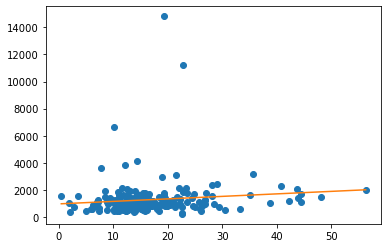

In [10]:
beta=mco1.params
plt.plot(datos['roe'], y, 'o')
xmin=np.min(datos['roe'])
xmax=np.max(datos['roe'])
plt.plot([xmin,xmax], [beta[0]+beta[1]*xmin,beta[0]+beta[1]*xmax])
plt.show()

El modelo obtenido permite realizar algunas gráficas más que nos permitirán validar el modelo:

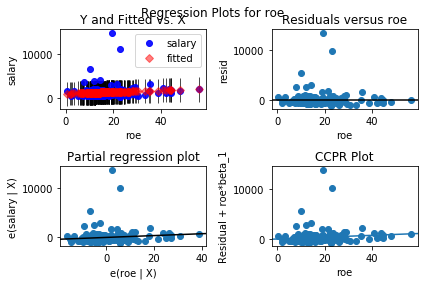

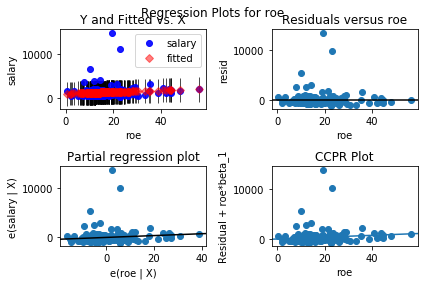

In [7]:
sm.graphics.plot_regress_exog(mco1, 'roe')

Del modelo se pueden extraer otras medidas como:

* Valores predichos $\hat y$
* Residuos



In [21]:
yhat=mco1.fittedvalues
e=mco1.resid

print(np.mean(y), np.mean(yhat))
R2=mco1.rsquared
print(R2)

SCT=mco1.mse_total
SCE=mco1.mse_model
SCR=mco1.ssr
mco1.ssr
print(SCT, SCE, SCR, SCE+SCR)


1281.1196172248804 1281.1196172248804
0.01318862408103394
1883331.6442767757 5166419.039866626 386566562.9697027 391732982.00956935


* ANOVA

In [9]:
table = sm.stats.anova_lm(mco1, typ=1)
print(table)

             df        sum_sq       mean_sq         F    PR(>F)
roe         1.0  5.166419e+06  5.166419e+06  2.766532  0.097768
Residual  207.0  3.865666e+08  1.867471e+06       NaN       NaN


* Suma de Cuadrados Totales (SCT)

In [22]:
mco1.centered_tss
sum((y-np.mean(y))**2)

391732982.00956935

* Suma de Cuadrados Explicada (SCE): $\sum_{i=1}^n (\hat{y}_i-\bar y)^2$

In [24]:
mco1.ess
sce=sum((mco1.fittedvalues-np.mean(y))**2)

print(mco1.ess, sce)

5166419.039866626 5166419.039866708


* Suma de Cuadrados de los residuos (SCR): $\sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i-\hat y_i)^2$

In [26]:
mco1.ssr
sum(e**2)
scr=sum((y - mco1.fittedvalues)**2)
print(mco1.ssr, scr)

386566562.9697027 386566562.9697028


* $R^2$ y $R^2$-ajustado

In [28]:
R2=mco1.rsquared
R2adj=mco1.rsquared_adj
print(R2, R2adj)

0.01318862408103394 0.008421419366449578


* Valor $F_{exp}$ y de $F_{teo}$. Para rechazar: $F_{exp} > F_{teo}(\alpha) \equiv F_{n-k, k-1, 1-\alpha}$

In [31]:
Fexp=mco1.fvalue
print(Fexp)
from scipy import stats
alpha=0.05
Fteo= stats.f.ppf(1-alpha, mco1.df_model, mco1.df_resid)
print(alpha, Fexp, Fteo)
alpha=0.10
Fteo= stats.f.ppf(1-alpha, mco1.df_model, mco1.df_resid)
print(alpha, Fexp, Fteo)

2.7665319344658634
0.05 2.7665319344658634 3.8867743652252242
0.1 2.7665319344658634 2.7299237376681003


* Valores $t_{exp}$ y $t_{teo}$: $t_{exp} > t_{teo} \equiv t_{n-1}(1-\frac{\alpha}{2})$

In [32]:
texp=mco1.tvalues
print("texp: ", texp)


texp:  Intercept    4.516930
roe          1.663289
dtype: float64


In [33]:
alpha=0.05
tteo= stats.t.ppf(1-(alpha/2),mco1.df_resid)
print(alpha)
print(tteo)

0.05
1.9714903918653968


In [34]:
alpha=0.10
tteo= stats.t.ppf(1-(alpha/2),mco1.df_resid)
print(alpha)
print(tteo)

0.1
1.6522480859926563


* Intervalos de confianza de Estimadores

In [36]:
mco1.conf_int(alpha=0.1)

,0,1
Intercept,610.865530,1315.517143
roe,0.122816,36.879556


* Estimación de la varianza de la pertrubación: $\hat \sigma^2 = \frac{SCR}{n-k}$

In [38]:
beta=np.array(mco1.params)
beta

array([963.19133647,  18.50118635])

In [41]:
sum(e**2)/mco1.df_resid

1867471.3186942164

* Predicciones:

In [48]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
epred, lb, ub = wls_prediction_std(mco1, weights=1)

In [49]:
x0=5
beta[0]+beta[1]*x0

1055.6972681986326

In [50]:
mco1.predict(exog=dict(roe=x0))

0    1055.697268
dtype: float64

## Cuestiones

1. Analizar el salario en función de los años de educación utilizando la base de datos **wage1**. Interpretar los coeficientes obtenidos. Dibuja ajustes y residuos.
$$
Salario = f(AÑOS EDUCACION)
$$
$$
y = f(X) \Rightarrow y = \beta_1 + \beta_2 x
$$

In [65]:
#dataWoo('wage1', description=True)
datos=dataWoo('wage1')

y=datos['wage']
X=sm.add_constant(datos['educ'])

mco2 = sm.OLS(y, X).fit()
mco2.summary()



#beta=mco2.params
#plt.plot(datos['educ'], y, 'o')
#xmin=np.min(datos['educ'])
#xmax=np.max(datos['educ'])
#plt.plot([xmin,xmax], [beta[0]+beta[1]*xmin,beta[0]+beta[1]*xmax])
#plt.show()


#e=mco2.resid

#plt.plot(e, 'o')


#sm.stats.anova_lm(mco2, typ=1)

e=mco2.resid
np.mean(e)

-2.2947423429134415e-15

$\widehat{salario} = -0.9049 + 0.5414 educación$

3. Ajustar el modelo lineal del porcentaje de votos obtenido por el candidato A en base al porcentaje de gastos de campa\~na para tal candidato con la base de datos **vote1**. Comprobar que la media de los residuos es 0 y cómo se relaciona la media de $y$ con respecto a la media de $\hat{y}$.
4. Ajustar el modelo no lineal $\log(wage) = \beta _0 + \beta_1 {\rm educ} + u$ con la base de datos {\bf wage1} e interpretar los resultados obtenidos.
5. Usar la base de datos {\bf 401K} para estudiar la relación entre el porcentage de trabajadores activos que est\'an inscritos en el plan de pensiones (prate) y la tase de contribución al plan (mrate)- cantidad promedio con que la empresa contribuye al plan de cada trabajador  por cada dolar que aporta el trabajador. Seg\'un este modelo, ¿qué prate se predice para mrate=3.5? ? Cu\'anta variación de prate se explica por mrate?
6. Usando la base de datos **charity**:
 * ¿Cuál es el donativo (gift) promedio de esta muestra? ¿Qu\'e porcentage no dio donativo?
 * ¿Cuál es el promedio de envíos por año (mailsyear)?
 * Estimar ${\rm gift} = \beta_0 + \beta_1 {\rm mailsyear} + u$.
 * Si cada envío cuesta un florín, espera la beneficiencia obtener una ganancia neta por cada env\'io?
 * ¿Cu\'al es el menor donativo? Con el modelo de regresi'on, se puede predecir que gift=0?
7. Realiza el siguiente experimento:
 * Generar $500$ observaciones uniformes $[0,10]$. Calcular para esta muestra la media y la desviación t\'ipica: $x$
 * Generar $500$ errores seg\'un una normal $N(0,36)$: $e$. ? Es el promedio de la muestra 0? ¿Cu\'al es su desviación t\'ipica?
 * Ahora generar $y_i = 1 + 2x_i + e_i$ para $i=1, \ldots, 500$.
 * Estimar el modelo $y = \beta_0 + \beta_1 x + u$. Comparar el modelo real con el modelo ajustado.
 * Obtener $\hat{u}$ y probar si $\sum_{i=1}^{500} \hat{u}_i =0$ y que $\sum_{i=1}^{500} x_i \hat{u}_i =0$. ¿Ocurre lo mismo con $u$?
 * Generar de nuevo el modelo y comparar los resultados obtenidos. ¿Son iguales?